<a href="https://colab.research.google.com/github/ayopel/checkers_neural_network-git/blob/master/%D7%A7%D7%95%D7%93_%D7%A8%D7%A7_%D7%9C%D7%9E%D7%95%D7%93%D7%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##טעינת נתונים

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
songs = pd.read_csv('/content/spotify_dataset.csv', engine='python', on_bad_lines='skip')
songs.head()

,Artist(s),song,text,Length,emotion,Genre,Album,Release Date,Key,Tempo,...,Good for Morning Routine,Similar Artist 1,Similar Song 1,Similarity Score 1,Similar Artist 2,Similar Song 2,Similarity Score 2,Similar Artist 3,Similar Song 3,Similarity Score 3
0,!!!,Even When the Waters Cold,Friends told her she was better off at the bot...,03:47,sadness,hip hop,Thr!!!er,29th April 2013,D min,105,...,0,Corey Smith,If I Could Do It Again,0.986061,Toby Keith,Drinks After Work,0.983719,Space,Neighbourhood,0.983236
1,!!!,One Girl / One Boy,"Well I heard it, playing soft From a drunken b...",04:03,sadness,hip hop,Thr!!!er,29th April 2013,A# min,117,...,0,Hiroyuki Sawano,BRE@TH//LESS,0.995409,When In Rome,Heaven Knows,0.990905,Justice Crew,Everybody,0.984483
2,!!!,Pardon My Freedom,"Oh my god, did I just say that out loud? Shoul...",05:51,joy,hip hop,Louden Up Now,8th June 2004,A Maj,121,...,0,Ricky Dillard,More Abundantly Medley Live,0.993176,Juliet,Avalon,0.965147,The Jacksons,Lovely One,0.956752
3,!!!,Ooo,[Verse 1] Remember when I called you on the te...,03:44,joy,hip hop,As If,16th October 2015,A min,122,...,0,Eric Clapton,Man Overboard,0.992749,Roxette,Don't Believe In Accidents,0.991494,Tiwa Savage,My Darlin,0.990381
4,!!!,Freedom 15,[Verse 1] Calling me like I got something to s...,06:00,joy,hip hop,As If,16th October 2015,F min,123,...,0,Cibo Matto,Lint Of Love,0.981610,Barrington Levy,Better Than Gold,0.981524,Freestyle,Its Automatic,0.981415


#סידור סוגי משתנים בעמודות

In [58]:
songs['Length'] = songs['Length'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))
# for col in songs.columns:
#     if 'Good for' in col:
#         songs[col] = songs[col].apply(lambda x: 'Yes' if x == 1 else 'No')
#רק כאשר עובדים עם גרפים

#מידע מבני על מאגר הנתונים:

---



##מבנה הדאטה הגולמי (לפני ניקוי והנדסת פיצ'רים). לדוג' מספר דגימות, מס עמודות .


מספר פיצ'רים: 39

39 פיצ'רים- עמודות ו551443 שורות

מידע כללי על הדאטה

##מה סוגי פיצ'רים במאגר הנתונים?


In [59]:
numerical_cols = songs.select_dtypes(include=np.number).columns
categorical_cols = songs.select_dtypes(include='object').columns

num_numerical = len(numerical_cols)
num_categorical = len(categorical_cols)
print("Number of numerical features:", num_numerical)
print("Number of categorical features:", num_categorical)

Number of numerical features: 22
Number of categorical features: 17


In [60]:
songs.drop_duplicates(inplace=True) # מחיקת כפילויות
songs.duplicated().any() # בדיקה אם נשארו כפילויות

np.False_

##בעזרת גרפים להראות כמות דגימות לא מלאה


In [61]:
# Calculate the number of numerical and categorical columns
numerical_cols = songs.select_dtypes(include=np.number).columns
categorical_cols = songs.select_dtypes(include='object').columns

num_numerical = len(numerical_cols)
num_categorical = len(categorical_cols)


Categorical Variable

In [62]:
feature_names= songs.columns.tolist()
feature_df= pd.DataFrame(feature_names, columns=['Features'])
feature_df

,Features
0,Artist(s)
1,song
2,text
3,Length
4,emotion
5,Genre
6,Album
7,Release Date
8,Key
9,Tempo


In [63]:

cols_to_drop = ['song', 'Album', 'Artist(s)', 'Similar Artist 1', 'Similar Song 1','Similarity Score 1','Similar Artist 2','Similar Song 2','Similarity Score 2','Similar Artist 3','Similar Song 3','Similarity Score 3','Good for Social Gatherings'
,'Release Date','Time signature',"Instrumentalness"]
songs.drop(columns=cols_to_drop, inplace=True)



In [64]:
songs.head()

,text,Length,emotion,Genre,Key,Tempo,Loudness (db),Explicit,Popularity,Energy,...,Liveness,Acousticness,Good for Party,Good for Work/Study,Good for Relaxation/Meditation,Good for Exercise,Good for Running,Good for Yoga/Stretching,Good for Driving,Good for Morning Routine
0,Friends told her she was better off at the bot...,227,sadness,hip hop,D min,105,-6.85db,No,40,83,...,16,11,0,0,0,0,0,0,0,0
1,"Well I heard it, playing soft From a drunken b...",243,sadness,hip hop,A# min,117,-5.75db,No,42,85,...,32,0,0,0,0,0,0,0,0,0
2,"Oh my god, did I just say that out loud? Shoul...",351,joy,hip hop,A Maj,121,-6.06db,No,29,89,...,64,0,0,0,0,1,0,0,0,0
3,[Verse 1] Remember when I called you on the te...,224,joy,hip hop,A min,122,-5.42db,No,24,84,...,12,12,0,0,0,1,0,0,0,0
4,[Verse 1] Calling me like I got something to s...,360,joy,hip hop,F min,123,-5.57db,No,30,71,...,10,4,0,0,0,1,0,0,0,0


##עבור קלסיפיקציה- כמות ותיאור המחלקות


Distribution of Emotion Classes:
            Count  Percentage
emotion                      
joy        189371   38.022335
sadness    156813   31.485267
anger       95489   19.172496
fear        26001    5.220539
love        25379    5.095653
surprise     4974    0.998691
True           17    0.003413
Love            2    0.000402
pink            2    0.000402
thirst          1    0.000201
angry           1    0.000201
confusion       1    0.000201
interest        1    0.000201


/tmp/ipython-input-3221617501.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_emotion_distribution.index, y=df_emotion_distribution['Percentage'], palette='viridis')


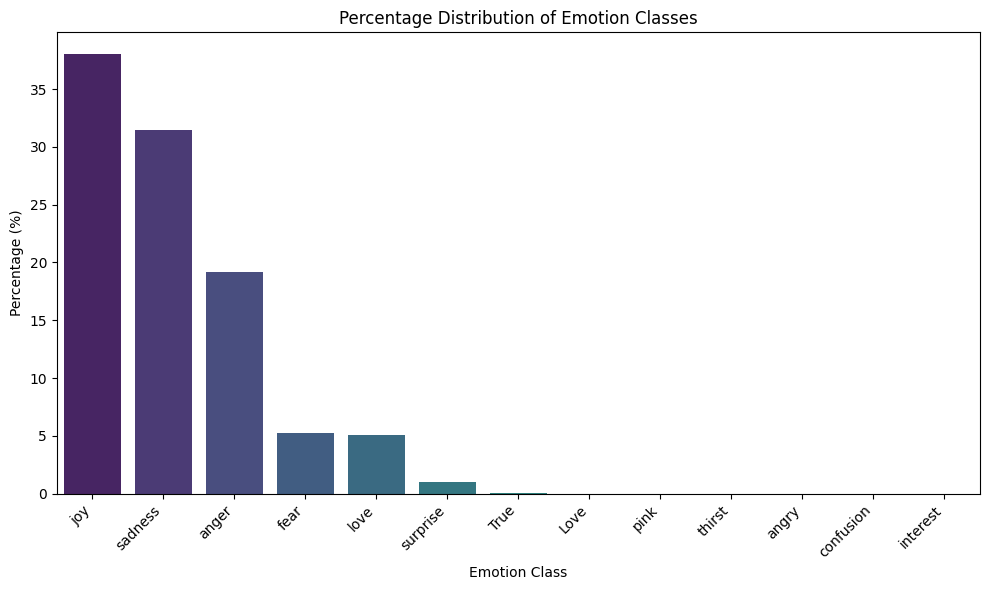

In [65]:
emotion_counts = songs['emotion'].value_counts()
emotion_percentages = songs['emotion'].value_counts(normalize=True) * 100

df_emotion_distribution = pd.DataFrame({
    'Count': emotion_counts,
    'Percentage': emotion_percentages
})

print("Distribution of Emotion Classes:")
print(df_emotion_distribution)

plt.figure(figsize=(10, 6))
sns.barplot(x=df_emotion_distribution.index, y=df_emotion_distribution['Percentage'], palette='viridis')
plt.title('Percentage Distribution of Emotion Classes')
plt.xlabel('Emotion Class')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [66]:
songs.groupby('emotion').describe()

Length                                                        \
              count        mean         std    min     25%    50%     75%   
emotion                                                                     
Love            2.0  187.500000   45.961941  155.0  171.25  187.5  203.75   
True           17.0  327.823529  347.683807   98.0  175.00  215.0  262.00   
anger       95489.0  215.486768   83.802529   14.0  170.00  207.0  248.00   
angry           1.0  387.000000         NaN  387.0  387.00  387.0  387.00   
confusion       1.0  144.000000         NaN  144.0  144.00  144.0  144.00   
fear        26001.0  229.498673   88.934692   15.0  184.00  218.0  260.00   
interest        1.0  149.000000         NaN  149.0  149.00  149.0  149.00   
joy        189371.0  225.236657   85.521134    5.0  180.00  215.0  256.00   
love        25379.0  224.680917   81.611285   16.0  179.00  214.0  256.00   
pink            2.0  160.500000   16.263456  149.0  154.75  160.5  166.25   
sadness    156813.0  228.116253   83.183809   13.0  183.00  217.0  258.00   
surprise     4974.0  223.878569   93.275895   24.0  179.00  213.0  255.00   
thirst          1.0  272.000000         NaN  272.0  272.00  272.0  272.00   

                      Tempo              ... Good for Driving       \
              max     count        mean  ...              75%  max   
emotion                                  ...                         
Love        220.0       2.0  131.000000  ...              0.0  0.0   
True       1561.0      17.0  121.823529  ...              0.0  0.0   
anger      3572.0   95489.0  121.607463  ...              0.0  1.0   
angry       387.0       1.0  104.000000  ...              0.0  0.0   
confusion   144.0       1.0  180.000000  ...              0.0  0.0   
fear       2108.0   26001.0  121.086151  ...              0.0  1.0   
interest    149.0       1.0   96.000000  ...              0.0  0.0   
joy        3301.0  189371.0  120.248502  ...              0.0  1.0   
love       2912.0   25379.0  118.686276  ...              0.0  1.0   
pink        172.0       2.0  127.000000  ...              0.0  0.0   
sadness    2968.0  156813.0  121.235612  ...              0.0  1.0   
surprise   2097.0    4974.0  119.861078  ...              0.0  1.0   
thirst      272.0       1.0   79.000000  ...              0.0  0.0   

          Good for Morning Routine                                          \
                             count      mean       std  min  25%  50%  75%   
emotion                                                                      
Love                           2.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
True                          17.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
anger                      95489.0  0.065191  0.246863  0.0  0.0  0.0  0.0   
angry                          1.0  0.000000       NaN  0.0  0.0  0.0  0.0   
confusion                      1.0  0.000000       NaN  0.0  0.0  0.0  0.0   
fear                       26001.0  0.062575  0.242201  0.0  0.0  0.0  0.0   
interest                       1.0  0.000000       NaN  0.0  0.0  0.0  0.0   
joy                       189371.0  0.066108  0.248472  0.0  0.0  0.0  0.0   
love                       25379.0  0.071713  0.258017  0.0  0.0  0.0  0.0   
pink                           2.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
sadness                   156813.0  0.058541  0.234764  0.0  0.0  0.0  0.0   
surprise                    4974.0  0.063128  0.243218  0.0  0.0  0.0  0.0   
thirst                         1.0  0.000000       NaN  0.0  0.0  0.0  0.0   

                
           max  
emotion         
Love       0.0  
True       0.0  
anger      1.0  
angry      0.0  
confusion  0.0  
fear       1.0  
interest   0.0  
joy        1.0  
love       1.0  
pink       0.0  
sadness    1.0  
surprise   1.0  
thirst     0.0  

[13 rows x 136 columns]

#חקירת פיצ'רים- עבור כל פיצ'ר שבחרנו לשמור:


In [67]:
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
songs.head()

,text,Length,emotion,Genre,Key,Tempo,Loudness (db),Explicit,Popularity,Energy,...,Liveness,Acousticness,Good for Party,Good for Work/Study,Good for Relaxation/Meditation,Good for Exercise,Good for Running,Good for Yoga/Stretching,Good for Driving,Good for Morning Routine
0,Friends told her she was better off at the bot...,227,sadness,hip hop,D min,105,-6.85db,No,40,83,...,16,11,0,0,0,0,0,0,0,0
1,"Well I heard it, playing soft From a drunken b...",243,sadness,hip hop,A# min,117,-5.75db,No,42,85,...,32,0,0,0,0,0,0,0,0,0
2,"Oh my god, did I just say that out loud? Shoul...",351,joy,hip hop,A Maj,121,-6.06db,No,29,89,...,64,0,0,0,0,1,0,0,0,0
3,[Verse 1] Remember when I called you on the te...,224,joy,hip hop,A min,122,-5.42db,No,24,84,...,12,12,0,0,0,1,0,0,0,0
4,[Verse 1] Calling me like I got something to s...,360,joy,hip hop,F min,123,-5.57db,No,30,71,...,10,4,0,0,0,1,0,0,0,0


In [69]:
num_features = songs.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = songs.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

In [70]:
cat_features

['text', 'emotion', 'Genre', 'Key', 'Loudness (db)', 'Explicit']

In [71]:
num_features

['Length',
 'Tempo',
 'Popularity',
 'Energy',
 'Danceability',
 'Positiveness',
 'Speechiness',
 'Liveness',
 'Acousticness',
 'Good for Party',
 'Good for Work/Study',
 'Good for Relaxation/Meditation',
 'Good for Exercise',
 'Good for Running',
 'Good for Yoga/Stretching',
 'Good for Driving',
 'Good for Morning Routine']

In [72]:
songs['emotion'].unique()


array(['sadness', 'joy', 'love', 'surprise', 'anger', 'fear', 'angry',
       'True', 'thirst', 'confusion', 'pink', 'interest', 'Love'],
      dtype=object)

In [73]:

replace_map = {
    'Love': 'love',
    'angry': 'anger',
    'interest': None,
    'pink': None,
    'confusion': None,
    'thirst': None,
    'True': None
}


songs['emotion'] = songs['emotion'].map(lambda x: replace_map.get(x, x))
songs = songs[songs['emotion'].notna()]
songs['emotion'].unique()


array(['sadness', 'joy', 'love', 'surprise', 'anger', 'fear'],
      dtype=object)

In [74]:
songs.isnull().sum()

,0
text,0
Length,0
emotion,0
Genre,0
Key,0
Tempo,0
Loudness (db),0
Explicit,0
Popularity,0
Energy,0


אורך (ממוצע/ מקסימלי/ מינימלי של נתון טקסטואלי

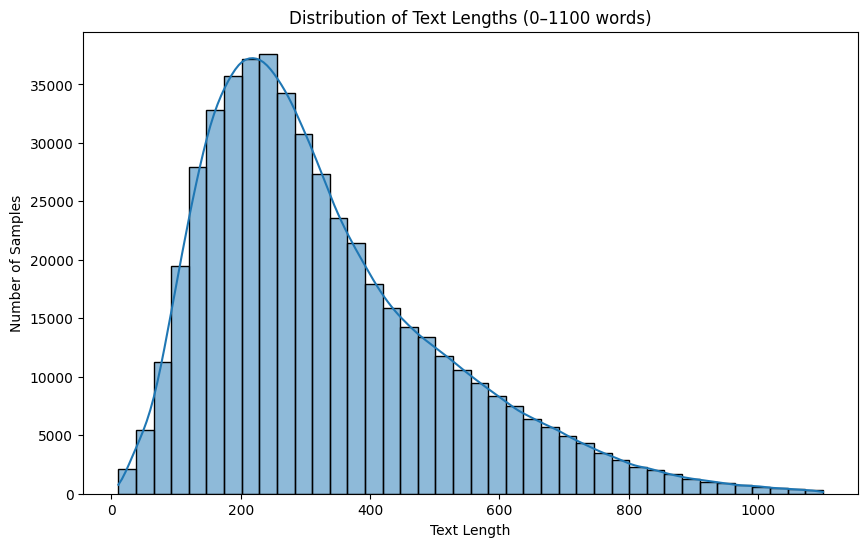

In [75]:
text_col = 'text'

# Calculate text length in words
songs['text_length'] = songs[text_col].astype(str).apply(lambda x: len(x.split()))

# Filter for lengths under 200
filtered_lengths = songs[songs['text_length'] <= 1100]['text_length']

plt.figure(figsize=(10, 6))
sns.histplot(filtered_lengths, bins=40, kde=True)
plt.title('Distribution of Text Lengths (0–1100 words)')
plt.xlabel('Text Length')
plt.ylabel('Number of Samples')
plt.show()


נבדוק אילו פיצ’רים קשורים זה לזה

#יחסים בין פיצ'רים (multivariate analysis):

In [76]:
songs.dropna(inplace=True)

In [77]:
cols_to_drop = ['text']
songs.drop(columns=cols_to_drop, inplace=True)

In [78]:
songs

,Length,emotion,Genre,Key,Tempo,Loudness (db),Explicit,Popularity,Energy,Danceability,...,Acousticness,Good for Party,Good for Work/Study,Good for Relaxation/Meditation,Good for Exercise,Good for Running,Good for Yoga/Stretching,Good for Driving,Good for Morning Routine,text_length
0,227,sadness,hip hop,D min,105,-6.85db,No,40,83,71,...,11,0,0,0,0,0,0,0,0,202
1,243,sadness,hip hop,A# min,117,-5.75db,No,42,85,70,...,0,0,0,0,0,0,0,0,0,242
2,351,joy,hip hop,A Maj,121,-6.06db,No,29,89,71,...,0,0,0,0,1,0,0,0,0,253
3,224,joy,hip hop,A min,122,-5.42db,No,24,84,78,...,12,0,0,0,1,0,0,0,0,280
4,360,joy,hip hop,F min,123,-5.57db,No,30,71,77,...,4,0,0,0,1,0,0,0,0,519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551438,219,joy,house,B min,140,-10db,Yes,31,82,83,...,39,0,0,0,1,0,0,0,0,447
551439,527,joy,metalcore,G# Maj,128,-9.68db,No,29,43,39,...,54,0,0,0,0,0,0,0,0,202
551440,233,sadness,hip hop,G# min,75,-4.67db,No,21,79,56,...,0,0,0,0,0,0,0,0,0,614
551441,192,sadness,hip hop,E Maj,126,-3.93db,No,5,90,59,...,27,0,0,0,1,0,0,0,0,197


#הנדסת פיצ'רים ראשונית:


In [79]:
songs.drop(columns=['Genre'])

,Length,emotion,Key,Tempo,Loudness (db),Explicit,Popularity,Energy,Danceability,Positiveness,...,Acousticness,Good for Party,Good for Work/Study,Good for Relaxation/Meditation,Good for Exercise,Good for Running,Good for Yoga/Stretching,Good for Driving,Good for Morning Routine,text_length
0,227,sadness,D min,105,-6.85db,No,40,83,71,87,...,11,0,0,0,0,0,0,0,0,202
1,243,sadness,A# min,117,-5.75db,No,42,85,70,87,...,0,0,0,0,0,0,0,0,0,242
2,351,joy,A Maj,121,-6.06db,No,29,89,71,63,...,0,0,0,0,1,0,0,0,0,253
3,224,joy,A min,122,-5.42db,No,24,84,78,97,...,12,0,0,0,1,0,0,0,0,280
4,360,joy,F min,123,-5.57db,No,30,71,77,70,...,4,0,0,0,1,0,0,0,0,519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551438,219,joy,B min,140,-10db,Yes,31,82,83,19,...,39,0,0,0,1,0,0,0,0,447
551439,527,joy,G# Maj,128,-9.68db,No,29,43,39,26,...,54,0,0,0,0,0,0,0,0,202
551440,233,sadness,G# min,75,-4.67db,No,21,79,56,41,...,0,0,0,0,0,0,0,0,0,614
551441,192,sadness,E Maj,126,-3.93db,No,5,90,59,69,...,27,0,0,0,1,0,0,0,0,197


In [80]:
num_cols = songs.select_dtypes(include=['int64', 'float64']).columns
cat_cols = songs.select_dtypes(include=['object', 'category']).columns

## טיפול בערכים חריגים

קידוד

In [82]:
songs.head()

,Length,emotion,Genre,Key,Tempo,Loudness (db),Explicit,Popularity,Energy,Danceability,...,Acousticness,Good for Party,Good for Work/Study,Good for Relaxation/Meditation,Good for Exercise,Good for Running,Good for Yoga/Stretching,Good for Driving,Good for Morning Routine,text_length
0,227,sadness,hip hop,D min,105,-6.85db,No,40,83,71,...,11,0,0,0,0,0,0,0,0,202
1,243,sadness,hip hop,A# min,117,-5.75db,No,42,85,70,...,0,0,0,0,0,0,0,0,0,242
2,351,joy,hip hop,A Maj,121,-6.06db,No,29,89,71,...,0,0,0,0,1,0,0,0,0,253
3,224,joy,hip hop,A min,122,-5.42db,No,24,84,78,...,12,0,0,0,1,0,0,0,0,280
4,360,joy,hip hop,F min,123,-5.57db,No,30,71,77,...,4,0,0,0,1,0,0,0,0,519


In [83]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

songs_encoded = songs.copy()

# Identify categorical columns that need encoding, excluding 'main_genres'
cat_cols = songs_encoded.select_dtypes(include=['object', 'category']).columns
if 'main_genres' in cat_cols:
    cat_cols = cat_cols.drop('main_genres') # Exclude the list-containing column

explicit_col = None
if 'Explicit' in cat_cols:
    explicit_col = 'Explicit'
    cat_cols = cat_cols.drop('Explicit')

# --- Label Encoding עבור כל יתר הקטגוריות ---
le = LabelEncoder()
for col in cat_cols:
    songs_encoded[col] = le.fit_transform(songs_encoded[col])

# --- One-Hot Encoding עבור EXPLICIT ---
if explicit_col:
    songs_encoded = pd.get_dummies(songs_encoded, columns=[explicit_col], drop_first=False)

songs_encoded.head()

,Length,emotion,Genre,Key,Tempo,Loudness (db),Popularity,Energy,Danceability,Positiveness,...,Good for Work/Study,Good for Relaxation/Meditation,Good for Exercise,Good for Running,Good for Yoga/Stretching,Good for Driving,Good for Morning Routine,text_length,Explicit_No,Explicit_Yes
0,227,4,1159,11,105,3281,40,83,71,87,...,0,0,0,0,0,0,0,202,True,False
1,243,4,1159,3,117,3170,42,85,70,87,...,0,0,0,0,0,0,0,242,True,False
2,351,2,1159,0,121,3203,29,89,71,63,...,0,0,1,0,0,0,0,253,True,False
3,224,2,1159,1,122,3137,24,84,78,97,...,0,0,1,0,0,0,0,280,True,False
4,360,2,1159,17,123,3152,30,71,77,70,...,0,0,1,0,0,0,0,519,True,False


In [84]:
songs_encoded.columns

Index(['Length', 'emotion', 'Genre', 'Key', 'Tempo', 'Loudness (db)',
       'Popularity', 'Energy', 'Danceability', 'Positiveness', 'Speechiness',
       'Liveness', 'Acousticness', 'Good for Party', 'Good for Work/Study',
       'Good for Relaxation/Meditation', 'Good for Exercise',
       'Good for Running', 'Good for Yoga/Stretching', 'Good for Driving',
       'Good for Morning Routine', 'text_length', 'Explicit_No',
       'Explicit_Yes'],
      dtype='object')

In [113]:
#trying to remove some columns and see if there is better models
songs_encoded=songs_encoded.drop(columns=["Key","Speechiness","Liveness"])

סקיילינג

In [114]:
from sklearn.preprocessing import StandardScaler

songs_ready = songs_encoded.copy()

#  מחיקת העמודה המקורית 'Explicit' אם קיימת
if 'Explicit' in songs_ready.columns:
    songs_ready = songs_ready.drop(columns=['Explicit'])

# המרה של Explicit_No ו-Explicit_Yes ל-0/1
for col in ['Explicit_No', 'Explicit_Yes']:
    if col in songs_ready.columns:
        songs_ready[col] = songs_ready[col].astype(int)

#  בחירת עמודות נומריות
num_cols = songs_ready.select_dtypes(include=['int64', 'float64']).columns

# סינון: רק עמודות עם יותר משני ערכים שונים (לא 0/1) ולא עמודת המטרה 'emotion'
cols_to_scale = [
    col for col in num_cols
    if songs_ready[col].nunique() > 2 and col != 'emotion'
]

# --- סקיילינג רק לעמודות הרלוונטיות ---
scaler = StandardScaler()
songs_ready[cols_to_scale] = scaler.fit_transform(songs_ready[cols_to_scale])

songs_ready.head()



,Length,emotion,Genre,Tempo,Loudness (db),Popularity,Energy,Danceability,Positiveness,Acousticness,...,Good for Work/Study,Good for Relaxation/Meditation,Good for Exercise,Good for Running,Good for Yoga/Stretching,Good for Driving,Good for Morning Routine,text_length,Explicit_No,Explicit_Yes
0,0.030066,4,-0.482618,-0.539255,0.664350,0.553457,0.892805,0.732696,1.657516,-0.508353,...,0,0,0,0,0,0,0,-0.591846,1,0
1,0.219065,4,-0.482618,-0.129178,0.572146,0.669809,0.980957,0.675069,1.657516,-0.879741,...,0,0,0,0,0,0,0,-0.417813,1,0
2,1.494812,2,-0.482618,0.007514,0.599558,-0.086479,1.157261,0.732696,0.661317,-0.879741,...,0,0,1,0,0,0,0,-0.369954,1,0
3,-0.005372,2,-0.482618,0.041687,0.544734,-0.377358,0.936881,1.136083,2.072599,-0.474591,...,0,0,1,0,0,0,0,-0.252482,1,0
4,1.601124,2,-0.482618,0.075860,0.557194,-0.028303,0.363893,1.078457,0.951875,-0.744691,...,0,0,1,0,0,0,0,0.787364,1,0


In [115]:
num_cols = songs_ready.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['Length', 'emotion', 'Genre', 'Tempo', 'Loudness (db)', 'Popularity',
       'Energy', 'Danceability', 'Positiveness', 'Acousticness',
       'Good for Party', 'Good for Work/Study',
       'Good for Relaxation/Meditation', 'Good for Exercise',
       'Good for Running', 'Good for Yoga/Stretching', 'Good for Driving',
       'Good for Morning Routine', 'text_length', 'Explicit_No',
       'Explicit_Yes'],
      dtype='object')

In [116]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    min_bound = Q1 - 1.5 * IQR
    max_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= min_bound) & (df[column] <= max_bound)]
    return filtered_df

In [117]:
for i in num_cols:
    songs_ready = remove_outliers(songs_ready, i)


##טקסט


In [90]:
import pandas as pd
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
import string
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#---------------------------------------------
def lower(text):
    return text.lower()

def tokenizer(text):
    tokenizer = WordPunctTokenizer()
    return tokenizer.tokenize(text)

def no_punct(text):
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in text]
    return [word for word in stripped if word.isalpha()]

def no_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return [w for w in text if not w in stop_words]

def lemmatizer(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in text]

def N_Grams(text, N):
    n_grams = ngrams(text, N)
    return [' '.join(grams) for grams in n_grams]

def text_preprocessing(text):
    text = lower(text)
    tokens = tokenizer(text)
    tokens = no_punct(tokens)
    tokens = no_stopwords(tokens)
    tokens = lemmatizer(tokens)
    return tokens


In [92]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
# def custom_tokenizer(text):
#     return text_preprocessing(text)

# vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, lowercase=False)
# tfidf_matrix = vectorizer.fit_transform(songs['text'])

# print("TF-IDF matrix shape:", tfidf_matrix.shape)
# print("Number of unique words:", len(vectorizer.get_feature_names_out()))

#מודל

##הפרדת הפיצ'רים מעמודת המטרה

In [118]:
songs.head()

,Length,emotion,Genre,Key,Tempo,Loudness (db),Explicit,Popularity,Energy,Danceability,...,Acousticness,Good for Party,Good for Work/Study,Good for Relaxation/Meditation,Good for Exercise,Good for Running,Good for Yoga/Stretching,Good for Driving,Good for Morning Routine,text_length
0,227,sadness,hip hop,D min,105,-6.85db,No,40,83,71,...,11,0,0,0,0,0,0,0,0,202
1,243,sadness,hip hop,A# min,117,-5.75db,No,42,85,70,...,0,0,0,0,0,0,0,0,0,242
2,351,joy,hip hop,A Maj,121,-6.06db,No,29,89,71,...,0,0,0,0,1,0,0,0,0,253
3,224,joy,hip hop,A min,122,-5.42db,No,24,84,78,...,12,0,0,0,1,0,0,0,0,280
4,360,joy,hip hop,F min,123,-5.57db,No,30,71,77,...,4,0,0,0,1,0,0,0,0,519


In [119]:
X = songs_ready.drop(columns=['emotion'])
y = songs_ready['emotion']
X.shape

(286723, 20)

In [120]:
y.shape

(286723,)

##חלוקה לאימון ומבחן

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##עיבוד נתונים

In [122]:
X = X.drop(columns=['Genre'])

,emotion
0,4
1,4
6,4
7,2
8,5
...,...
551433,4
551434,4
551436,3
551440,4


In [123]:
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object", "category"]).columns.tolist()


In [124]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [125]:
numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_pipeline, numeric_features),
    ("cat", categorical_pipeline, categorical_features)
])

In [126]:
X.head()

,Length,Tempo,Loudness (db),Popularity,Energy,Danceability,Positiveness,Acousticness,Good for Party,Good for Work/Study,Good for Relaxation/Meditation,Good for Exercise,Good for Running,Good for Yoga/Stretching,Good for Driving,Good for Morning Routine,text_length,Explicit_No,Explicit_Yes
0,0.030066,-0.539255,0.664350,0.553457,0.892805,0.732696,1.657516,-0.508353,0,0,0,0,0,0,0,0,-0.591846,1,0
1,0.219065,-0.129178,0.572146,0.669809,0.980957,0.675069,1.657516,-0.879741,0,0,0,0,0,0,0,0,-0.417813,1,0
6,-0.064434,-0.573428,0.665180,-0.784590,1.157261,0.559815,0.744334,-0.879741,0,0,0,0,0,0,0,0,-0.126308,1,0
7,1.565687,-0.026659,0.594574,-0.202831,1.113185,1.078457,1.989582,-0.879741,0,0,0,0,0,0,0,0,-0.178518,1,0
8,0.349002,-0.026659,0.820515,0.146225,0.407969,1.597098,0.453776,-0.677166,0,0,0,0,0,0,0,0,-0.326446,1,0


In [127]:
preprocessor.fit(X_train)

# Transform the data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("\nProcessed train shape:", X_train_processed.shape)
print("Processed test shape:", X_test_processed.shape)


Processed train shape: (200706, 20)
Processed test shape: (86017, 20)


##אימון מודלים

In [128]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

In [129]:
for col in songs.columns:
    if songs[col].dtype == 'object':
        print(f"Column {col} is still object")


Column emotion is still object
Column Genre is still object
Column Key is still object
Column Loudness (db) is still object
Column Explicit is still object


In [143]:
models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=20000),
        "params": {
            "C": [20,0.3,0.5,0.9]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [50, 40,35]
        }

    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [None, 4, 5, 7],
            "min_samples_split": [2, 5, 10]
        }
    }
}

In [144]:
#GridSearchCV
best_models = {}

for name, mp in models.items():
    print(f"Training {name}...")
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, n_jobs=-1)
    clf.fit(X_train_processed, y_train)


    best_models[name] = clf.best_estimator_
    print(f"Best params for {name}: {clf.best_params_}\n")

Training Logistic Regression...
Best params for Logistic Regression: {'C': 20}

Training KNN...
Best params for KNN: {'n_neighbors': 35}

Training Decision Tree...
Best params for Decision Tree: {'max_depth': 7, 'min_samples_split': 2}



##השוואת מודלים

In [145]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    balanced_accuracy_score,
    f1_score
)
import pandas as pd

results = []

for name, model in best_models.items():
    y_pred = model.predict(X_test_processed)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Balanced Accuracy: {bal_acc:.4f}")
    print(f"Macro F1: {f1:.4f}")

    # zero_division מונע את האזהרה ומטפל נכון במקרים קיצוניים
    print(classification_report(
        y_test,
        y_pred,
        zero_division=0
    ))

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Balanced Accuracy': bal_acc,
        'Macro F1': f1
    })

# סיכום
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Macro F1', ascending=False)
results_df


--- Logistic Regression ---
Accuracy: 0.4086
Balanced Accuracy: 0.2121
Macro F1: 0.2025
              precision    recall  f1-score   support

           0       0.40      0.26      0.31     15786
           1       0.00      0.00      0.00      4493
           2       0.41      0.58      0.48     32143
           3       0.00      0.00      0.00      4175
           4       0.41      0.44      0.42     28552
           5       0.00      0.00      0.00       868

    accuracy                           0.41     86017
   macro avg       0.20      0.21      0.20     86017
weighted avg       0.36      0.41      0.38     86017

--- KNN ---
Accuracy: 0.3999
Balanced Accuracy: 0.2071
Macro F1: 0.1973
              precision    recall  f1-score   support

           0       0.38      0.24      0.29     15786
           1       0.00      0.00      0.00      4493
           2       0.41      0.56      0.47     32143
           3       0.00      0.00      0.00      4175
           4       0.40   

,Model,Accuracy,Balanced Accuracy,Macro F1
0,Logistic Regression,0.408594,0.212123,0.202505
2,Decision Tree,0.408419,0.208726,0.198316
1,KNN,0.399863,0.207059,0.197277


##הערכת מודל מול דאטה של המבחן

In [146]:

best_model_name = results_df.iloc[0]["Model"]
best_model = best_models[best_model_name]

print(f"\n🏆 Best Model Selected: {best_model_name}")


🏆 Best Model Selected: Logistic Regression


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(



Final Test Accuracy: 0.3997349361172791


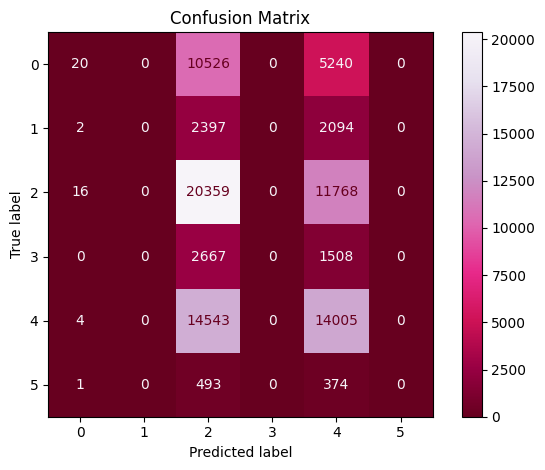

In [154]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = best_models["Logistic Regression"].predict(X_test)

print("\nFinal Test Accuracy:", accuracy_score(y_pred, y_test))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
#בגלל שיש חיזוי ממש לא טוב יש בעיות של חלוקה ב0
ConfusionMatrixDisplay.from_estimator(
    best_model,
    X_test,
    y_test,
    cmap="PuRd_r",
    values_format="d"
)

plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [151]:
#סתם בשביל לראות
y_test.value_counts()

array([4, 2, 4, ..., 0, 2, 4])

In [ ]:
songs.head()

In [ ]:
songs.columns

In [ ]:
# plt.figure(figsize=(12, 7))
# sns.countplot(data=songs, x='emotion', hue='Instrumentalness', palette='viridis')
# plt.title('Distribution of Instrumentalness Content by Emotion')
# plt.xlabel('Emotion')
# plt.ylabel('Count')
# plt.xticks(rotation=45, ha='right')
# plt.legend(title='Explicit')
# plt.tight_layout()
# plt.show()

In [ ]:
# print(f"Average length of text column: {avg_len:.2f} words")

In [ ]:
categorical_cols

In [ ]:
songs
